In [1]:
import pandas as pd
from xgboost import XGBRegressor

In [2]:
train_df = pd.read_csv("drugs_train.csv")

In [3]:
train_df.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies,price
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),2.83
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE,14.30


In [4]:
train_df.shape

(8564, 14)

In [5]:
train_df.drug_id.nunique()

8564

In [6]:
train_df.administrative_status.value_counts()

Présentation active     8554
Présentation abrogée      10
Name: administrative_status, dtype: int64

In [7]:
train_df.marketing_status.value_counts()

Déclaration de commercialisation                                      7262
Déclaration d'arrêt de commercialisation                              1250
Arrêt de commercialisation (le médicament n'a plus d'autorisation)      51
Déclaration de suspension de commercialisation                           1
Name: marketing_status, dtype: int64

In [8]:
train_df.approved_for_hospital_use.value_counts()

oui    7022
non    1542
Name: approved_for_hospital_use, dtype: int64

In [9]:
train_df.reimbursement_rate.value_counts()

65%     7175
30%      656
15%      393
100%     339
0%         1
Name: reimbursement_rate, dtype: int64

In [10]:
train_df.dosage_form.value_counts().head(10)

comprimé pelliculé               1931
comprimé                         1017
comprimé sécable                  812
comprimé pelliculé sécable        669
gélule                            639
solution injectable               496
gélule gastro-résistant(e)        256
gélule à libération prolongée     175
comprimé gastro-résistant(e)      160
comprimé orodispersible           136
Name: dosage_form, dtype: int64

In [11]:
train_df.route_of_administration.value_counts()

orale                                                                                                         6948
cutanée                                                                                                        225
intraveineuse                                                                                                  224
sous-cutanée                                                                                                   177
ophtalmique                                                                                                    162
                                                                                                              ... 
intramusculaire,intrathécale,intraveineuse                                                                       1
intra-articulaire,périarticulaire,péridurale,voie parentérale autre                                              1
endocanalaire,intra-artérielle,intraveineuse                                    

In [12]:
train_df.marketing_authorization_status.value_counts()

Autorisation active      8169
Autorisation abrogée      314
Autorisation archivée      75
Autorisation retirée        6
Name: marketing_authorization_status, dtype: int64

In [13]:
train_df.pharmaceutical_companies.value_counts()

 TEVA SANTE               777
 SANOFI AVENTIS FRANCE    571
 MYLAN SAS                567
 BIOGARAN                 496
 SANDOZ                   456
                         ... 
 LABCATAL                   1
 GEDEON RICHTER             1
 LABORATOIRE UNITHER        1
 TERALI                     1
 LABORATOIRES DOLIAGE       1
Name: pharmaceutical_companies, Length: 325, dtype: int64

## Dummies

In [14]:
df = train_df[["marketing_status", "price"]]

In [15]:
df_x = pd.get_dummies(data=df.drop("price", axis=1), drop_first=True)

In [16]:
df_x

,marketing_status_Déclaration d'arrêt de commercialisation,marketing_status_Déclaration de commercialisation,marketing_status_Déclaration de suspension de commercialisation
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8559,1,0,0
8560,0,1,0
8561,1,0,0
8562,0,1,0


In [17]:
import numpy as np

df_y = np.log1p(df.price)

In [18]:
df_y.describe()

count    8564.000000
mean        2.441039
std         1.144582
min         0.470004
25%         1.597365
50%         2.190536
75%         3.050694
max         6.899108
Name: price, dtype: float64

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [558]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
mean_absolute_error(np.expm1(predicted), np.expm1(Y_test))

24.153362745985522

## XGBOOST

In [518]:
X, y = train_df.drop(columns=["price"]), train_df.price

In [519]:
X.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG)
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE


In [520]:
X.drug_id.nunique()

8564

In [521]:
X.columns

Index(['drug_id', 'description', 'administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate', 'dosage_form',
       'route_of_administration', 'marketing_authorization_status',
       'marketing_declaration_date', 'marketing_authorization_date',
       'marketing_authorization_process', 'pharmaceutical_companies'],
      dtype='object')

In [522]:
y.describe()

count    8564.000000
mean       28.530284
std        81.394061
min         0.600000
25%         3.940000
50%         7.940000
75%        20.130000
max       990.390000
Name: price, dtype: float64

In [523]:
X.head(3)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG)
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE
2,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,20000101,19960101,Procédure nationale,MYLAN SAS


In [524]:
X["marketing_declaration_date"] = pd.to_datetime(X.marketing_declaration_date, format="%Y%m%d")
X["marketing_authorization_date"] = pd.to_datetime(X.marketing_authorization_date, format="%Y%m%d")

X["marketing_days_elapsed"] = X["marketing_declaration_date"] - X["marketing_authorization_date"]
X["marketing_days_elapsed"] = abs(X["marketing_days_elapsed"].dt.days)

In [525]:
X["reimbursement_rate"] = X.reimbursement_rate.str.replace("%", "")
X["reimbursement_rate"] = X["reimbursement_rate"].astype(int)
X["reimbursement_rate"] /= 100

In [526]:
X.reimbursement_rate.head()

0    0.65
1    0.65
2    0.65
3    0.65
4    1.00
Name: reimbursement_rate, dtype: float64

In [527]:
X.administrative_status = X.administrative_status.apply(lambda x: 1 if "active" in x else 0)

In [528]:
X.approved_for_hospital_use = X.approved_for_hospital_use.apply(lambda x: 1 if "oui" in x else 0)

In [529]:
X["year"] = X.marketing_declaration_date.dt.year

In [508]:
X["company_year"] = X.pharmaceutical_companies + "_" + X.year.astype(str)

In [509]:
X.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies,marketing_days_elapsed,year,company_year
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,Déclaration de commercialisation,1,0.65,comprimé pelliculé,orale,Autorisation active,2014-01-01,2014-01-01,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),0,2014,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG)_2014
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,1,Déclaration de commercialisation,1,0.65,comprimé à croquer,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,TEVA SANTE,1461,2013,TEVA SANTE_2013


In [530]:
y_log = np.log1p(y)

In [531]:
X = X.drop(columns=["drug_id", "description", 'marketing_declaration_date', 'marketing_authorization_date'])

In [532]:
X.columns

Index(['administrative_status', 'marketing_status',
       'approved_for_hospital_use', 'reimbursement_rate', 'dosage_form',
       'route_of_administration', 'marketing_authorization_status',
       'marketing_authorization_process', 'pharmaceutical_companies',
       'marketing_days_elapsed', 'year'],
      dtype='object')

In [533]:
one_hot_columns = ["marketing_status", 
                   "marketing_authorization_status",
                   "marketing_authorization_process"
                  ]

high_dim_columns = ["dosage_form", "route_of_administration", "pharmaceutical_companies"]

bins_columns = ["marketing_days_elapsed"]
nums_columns = ["reimbursement_rate"]

In [534]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from category_encoders import MEstimateEncoder
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y_log, test_size = .20, random_state = 40)

In [535]:
X_train["price"] = Y_train
X_test["price"] = Y_test

In [536]:
for hdc in high_dim_columns:
    mean_price = X_train.groupby(hdc).price.mean()
    median_price = X_train.groupby(hdc).price.median()
    qauntile_75_price = X_train.groupby(hdc).price.quantile(0.75)
    
    X_train[hdc + "_mean"] = X_train[hdc].map(mean_price)
    X_test[hdc + "_mean"] = X_test[hdc].map(mean_price)
    X_train[hdc + "_median"] = X_train[hdc].map(median_price)
    X_test[hdc + "_median"] = X_test[hdc].map(median_price)
    X_train[hdc + "_q75"] = X_train[hdc].map(qauntile_75_price)
    X_test[hdc + "_q75"] = X_test[hdc].map(qauntile_75_price)
    


drop_columns = high_dim_columns + ["price"]
X_train.drop(columns=drop_columns, inplace=True)
X_test.drop(columns=drop_columns, inplace=True)

In [537]:
X_train.head(2)

,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,marketing_authorization_status,marketing_authorization_process,marketing_days_elapsed,year,dosage_form_mean,dosage_form_median,dosage_form_q75,route_of_administration_mean,route_of_administration_median,route_of_administration_q75,pharmaceutical_companies_mean,pharmaceutical_companies_median,pharmaceutical_companies_q75
2850,1,Déclaration de commercialisation,1,0.65,Autorisation active,Procédure nationale,4383,2014,2.033428,1.996060,2.758743,2.35611,2.166765,2.977059,2.303321,2.116792,2.974763
3258,1,Déclaration de commercialisation,1,1.00,Autorisation active,Procédure de reconnaissance mutuelle,365,2006,4.108457,4.530784,5.446150,4.91321,5.000046,5.941123,2.178918,1.342865,3.008648


In [538]:
X_test.head(2)

,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,marketing_authorization_status,marketing_authorization_process,marketing_days_elapsed,year,dosage_form_mean,dosage_form_median,dosage_form_q75,route_of_administration_mean,route_of_administration_median,route_of_administration_q75,pharmaceutical_companies_mean,pharmaceutical_companies_median,pharmaceutical_companies_q75
3955,1,Déclaration de commercialisation,1,0.65,Autorisation active,Procédure de reconnaissance mutuelle,730,1992,2.283879,2.211566,2.966303,2.35611,2.166765,2.977059,2.580888,2.538640,2.858217
5939,1,Déclaration de commercialisation,1,0.65,Autorisation active,Procédure nationale,8035,2015,2.480157,2.221375,3.103240,2.35611,2.166765,2.977059,2.270858,2.145931,2.977059


In [539]:
len(X_test.columns) == len(X_train.columns)

True

In [540]:
full_pipeline = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_columns), 
    ('bins', KBinsDiscretizer(n_bins=20, strategy='uniform', encode='ordinal'), bins_columns),
], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [551]:
# train the model
model = XGBRegressor(n_estimators=10, max_depth=7, verbosity=1, reg_lambda=0.001, reg_alpha=0.1)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=0.001, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [552]:
mean_absolute_error(model.predict(X_train), Y_train)

0.49809611966208805

In [559]:
median_absolute_error(model.predict(X_train), Y_train)

0.4166950654935089

In [553]:
mean_absolute_error(model.predict(X_test), Y_test)

0.6008187371500257

In [560]:
median_absolute_error(model.predict(X_test), Y_test)

0.482414836764546

In [554]:
mean_absolute_error(np.expm1(model.predict(X_train)), np.expm1(Y_train))

13.644029576210816

In [555]:
mean_absolute_error(np.expm1(model.predict(X_test)), np.expm1(Y_test))

19.604686040878292

In [556]:
from sklearn.feature_selection import SelectFromModel

In [557]:
threshold = np.sort(model.feature_importances_)
for thresh in threshold:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor(n_estimators=10, max_depth=10, verbosity=1, reg_lambda=0.001, reg_alpha=0.1)
    selection_model.fit(select_X_train, Y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    accuracy = mean_absolute_error(np.expm1(selection_model.predict(select_X_test)), np.expm1(Y_test))
    print("Thresh=%.3f, n=%d, accuracy score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy))

Thresh=0.000, n=27, accuracy score: 18.55%
Thresh=0.000, n=27, accuracy score: 18.55%
Thresh=0.000, n=27, accuracy score: 18.55%
Thresh=0.000, n=27, accuracy score: 18.55%
Thresh=0.002, n=23, accuracy score: 18.46%
Thresh=0.002, n=22, accuracy score: 18.44%
Thresh=0.004, n=21, accuracy score: 18.47%
Thresh=0.006, n=20, accuracy score: 18.91%
Thresh=0.008, n=19, accuracy score: 18.76%
Thresh=0.010, n=18, accuracy score: 18.84%
Thresh=0.012, n=17, accuracy score: 18.93%
Thresh=0.013, n=16, accuracy score: 18.94%
Thresh=0.014, n=15, accuracy score: 19.18%
Thresh=0.018, n=14, accuracy score: 19.22%
Thresh=0.018, n=13, accuracy score: 19.36%
Thresh=0.020, n=12, accuracy score: 19.46%
Thresh=0.020, n=11, accuracy score: 19.35%
Thresh=0.022, n=10, accuracy score: 19.56%
Thresh=0.023, n=9, accuracy score: 19.45%
Thresh=0.027, n=8, accuracy score: 19.06%
Thresh=0.028, n=7, accuracy score: 18.97%
Thresh=0.057, n=6, accuracy score: 19.35%
Thresh=0.064, n=5, accuracy score: 19.28%
Thresh=0.131, n=

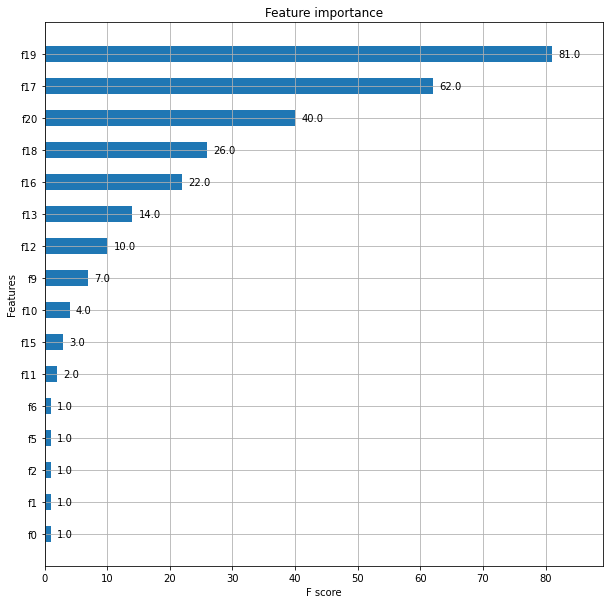

In [281]:
import xgboost as xgb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.show()

In [137]:
price_evolution = train_df[["marketing_declaration_date", "price"]].sort_values("marketing_declaration_date")

In [138]:
price_evolution.marketing_declaration_date = pd.to_datetime(price_evolution.marketing_declaration_date, format="%Y%m%d")

In [142]:
price_evolution = price_evolution.sort_values("marketing_declaration_date")

In [151]:
price_evolution_first = price_evolution[price_evolution.price <= 400]
price_evolution_second = price_evolution[price_evolution.price > 400]

In [143]:
import matplotlib.pyplot as plt

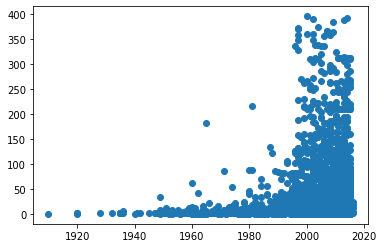

In [150]:
plt.scatter(price_evolution_first.marketing_declaration_date, price_evolution_first.price)

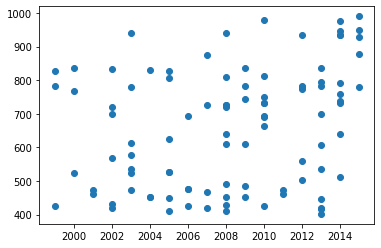

In [152]:
plt.scatter(price_evolution_second.marketing_declaration_date, price_evolution_second.price)

In [146]:
X_past = price_evolution[price_evolution.marketing_declaration_date <= "2018-01-01"]
X_future = price_evolution[price_evolution.marketing_declaration_date > "2018-01-01"]

In [238]:
features = pd.read_csv("drug_label_feature_eng.csv")

In [239]:
features.head(2)

,description,label_plaquette,label_ampoule,label_flacon,label_tube,label_stylo,label_seringue,label_pilulier,label_sachet,label_comprime,...,count_stylo,count_seringue,count_pilulier,count_sachet,count_comprime,count_gelule,count_film,count_poche,count_capsule,count_ml
0,12 sachet(s) papier aluminium polyéthylène de ...,0,0,0,0,0,0,0,1,0,...,0,0,0,12,0,0,0,0,0,0.0
1,plaquette(s) thermoformée(s) (ACLAR RX) polytr...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,28,0,0,0,0,0.0


In [243]:
for i, f in features.head(10).iterrows():
    print(f.description)
    print("="*10)

12 sachet(s) papier aluminium polyéthylène de 0,52  g
plaquette(s) thermoformée(s) (ACLAR RX) polytrifluorochloroéthylène de 28 comprimé(s) (distributeur parallèle : PHARMA LAB)
tube(s) polypropylène dioxyde de titane de 30 comprimé(s)
plaquette(s) thermoformée(s) polyamide aluminium PVC de 20 comprimé(s)
1 flacon(s) pressurisé(e)(s) aluminium de 120  dose(s) avec valve(s) doseuse(s) polypropylène
1 flacon(s) polyéthylène poudreur(se)(s) de 30  g
1 poche(s) polypropylène SIS : styrène-isoprène-styrène styrène éthylène butadiène suremballée(s)/surpochée(s) de 1000 ml avec site d'addition Luer Lock
plaquette(s) PVC-Aluminium de 100 comprimé(s)
flacon(s) en verre de 160 ml avec fermeture de sécurité avec seringue(s) pour administration orale polypropylène avec gobelet(s) doseur(s) polypropylène
2 seringue(s) préremplie(s) en verre de 0,8 ml


In [11]:
features.shape

(3010, 28)

In [270]:
ingredients = pd.read_csv("active_ingredients.csv")

In [13]:
ingredients

,drug_id,active_ingredient
0,0_train,DÉSOGESTREL
1,1_train,MONTÉLUKAST ACIDE
2,1_train,MONTÉLUKAST SODIQUE
3,2_train,CHLORHYDRATE DE DILTIAZEM
4,3_train,ACIDE VALPROÏQUE
...,...,...
19842,3668_test,PANTOPRAZOLE
19843,3669_test,ACIDE ZOLÉDRONIQUE ANHYDRE
19844,3669_test,ACIDE ZOLÉDRONIQUE MONOHYDRATÉ
19845,3670_test,CONCENTRAT DE VITAMINE A SYNTHÉTIQUE


In [14]:
test_df = pd.read_csv("drugs_test.csv")

In [15]:
test_df.head(2)

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies
0,0_test,plaquette(s) thermoformée(s) polyamide alumini...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé gastro-résistant(e),orale,Autorisation active,20130101,20080101,Procédure de reconnaissance mutuelle,TEVA SANTE
1,1_test,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,Présentation active,Déclaration de commercialisation,non,30%,capsule,vaginale,Autorisation active,20120101,19970101,Procédure nationale,INNOTECH INTERNATIONAL


In [ ]:
# Year and companyfeature
mean_price = X_train.groupby("company_year").price.mean()
median_price = X_train.groupby("company_year").price.median()
qauntile_75_price = X_train.groupby("company_year").price.quantile(0.75)
X_train["company_year_mean"] = X_train["company_year"].map(mean_price)
X_test["company_year_mean"] = X_test["company_year"].map(mean_price)
X_train["company_year_median"] = X_train["company_year"].map(median_price)
X_test["company_year_median"] = X_test["company_year"].map(median_price)
X_train["company_year_q75"] = X_train["company_year"].map(qauntile_75_price)
X_test["company_year_q75"] = X_test["company_year"].map(qauntile_75_price)
